# Importing libraries - will import other libraries later as we'll need them

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt       
%matplotlib inline 
import seaborn as sns

# A peek into our dataset

In [2]:
d2=pd.read_csv('Bank_Personal_Loan_Modelling.csv')
df=pd.read_csv('Bank_Personal_Loan_Modelling.csv')
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [3]:
df.info()
#so we have 14 columns with 5000 entries

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
ID                    5000 non-null int64
Age                   5000 non-null int64
Experience            5000 non-null int64
Income                5000 non-null int64
ZIP Code              5000 non-null int64
Family                5000 non-null int64
CCAvg                 5000 non-null float64
Education             5000 non-null int64
Mortgage              5000 non-null int64
Personal Loan         5000 non-null int64
Securities Account    5000 non-null int64
CD Account            5000 non-null int64
Online                5000 non-null int64
CreditCard            5000 non-null int64
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [4]:
df.isnull().sum()
#it doesnt seem that we have null values yet

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

**lets confirm if we have null values or not**

In [5]:
for cols in df.columns:
    print(cols,":",sum(df[cols]=='?'))

ID : 0
Age : 0
Experience : 0
Income : 0
ZIP Code : 0
Family : 0
CCAvg : 0
Education : 0
Mortgage : 0
Personal Loan : 0
Securities Account : 0
CD Account : 0
Online : 0
CreditCard : 0


C:\Users\sunaal\Anaconda3\lib\site-packages\pandas\core\ops\__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


In [6]:
for cols in df.columns:
    print(cols,":",sum(df[cols]=='-'))

ID : 0
Age : 0
Experience : 0
Income : 0
ZIP Code : 0
Family : 0
CCAvg : 0
Education : 0
Mortgage : 0
Personal Loan : 0
Securities Account : 0
CD Account : 0
Online : 0
CreditCard : 0


In [7]:
#hence we dont have null values in our dataset

**lets take a look at every column and its datatype**

In [8]:
df.dtypes
#id of the customer - integer
#age of the customer - integer
#no. of years of professional experience - integer
#anuall income in thousand dollar - integer
#zipcode of their home address - integer
#no. of members in the family - integer
#avg. monthly spending on credit card in thousand dollars- float

#education(this one is categorical) but its datatype is integer(we must change the datatype to category). There are 3 
#categories -  1: Undergrad; 2: Graduate; 3: Advanced/Professional

#value of house mortgage in thousand dollar - integer

#personal loan is our target variable - it must be categorical but its datatype is integer (we must change the datatype
#to category)

#similarly, security account,cd account,online,creditcard; all are categorical but their datatypes are integer hence we must 
#convert it to categorical

ID                      int64
Age                     int64
Experience              int64
Income                  int64
ZIP Code                int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal Loan           int64
Securities Account      int64
CD Account              int64
Online                  int64
CreditCard              int64
dtype: object

In [9]:
#converting datatype of all categorical columns from integer to category  
df['Education'] = df['Education'].astype('category')
df['Personal Loan'] = df['Personal Loan'].astype('category')
df['Securities Account'] = df['Securities Account'].astype('category')
df['CD Account'] = df['CD Account'].astype('category')
df['Online'] = df['Online'].astype('category')
df['CreditCard'] = df['CreditCard'].astype('category')

In [10]:
df.dtypes

ID                       int64
Age                      int64
Experience               int64
Income                   int64
ZIP Code                 int64
Family                   int64
CCAvg                  float64
Education             category
Mortgage                 int64
Personal Loan         category
Securities Account    category
CD Account            category
Online                category
CreditCard            category
dtype: object

In [11]:
#we can remove ID column and Zipcode since they have no significance on our target variable
df.drop(['ID','ZIP Code'],axis=1,inplace=True)
df.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,4,1.6,1,0,0,1,0,0,0
1,45,19,34,3,1.5,1,0,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,0,1


**lets take a peek at the summary statistics of our numerical columns**

In [12]:
df.describe()

,Age,Experience,Income,Family,CCAvg,Mortgage
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,45.338400,20.104600,73.774200,2.396400,1.937938,56.498800
std,11.463166,11.467954,46.033729,1.147663,1.747659,101.713802
min,23.000000,-3.000000,8.000000,1.000000,0.000000,0.000000
25%,35.000000,10.000000,39.000000,1.000000,0.700000,0.000000
50%,45.000000,20.000000,64.000000,2.000000,1.500000,0.000000
75%,55.000000,30.000000,98.000000,3.000000,2.500000,101.000000
max,67.000000,43.000000,224.000000,4.000000,10.000000,635.000000


In [13]:
#we can see how income and mortgage have a very high standard deviation
#also mean and median of the income and mortgage column is very different. Hence these columns must be highly skewed and 
#must have outliers 
#we will take a deeper look at these in EDA section

we can also see that minimum value in experience is -3. It seems that experience column has negative values. Since experience cannot be -ve, therefore we will replace all negative experience values with 0

In [14]:
df['Experience'][df['Experience']<0].count()
#hence we can see there are 52 values in experience column that are negative

52

In [15]:
df['Experience'][df['Experience']<0]=0

C:\Users\sunaal\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [16]:
df['Experience'][df['Experience']<0].count()

0

### lets see how target variable 'personal loan' is distributed (distribution of target column)

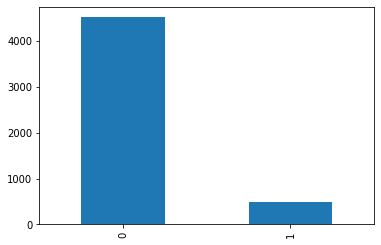

In [17]:
pd.value_counts(df["Personal Loan"]).plot(kind="bar")

In [18]:
df["Personal Loan"].value_counts(normalize=True)
#we see that this is a very imbalanced data..about 90.4% people did not accept the personal loan

0    0.904
1    0.096
Name: Personal Loan, dtype: float64

# EDA

## univariate analysis of our our features

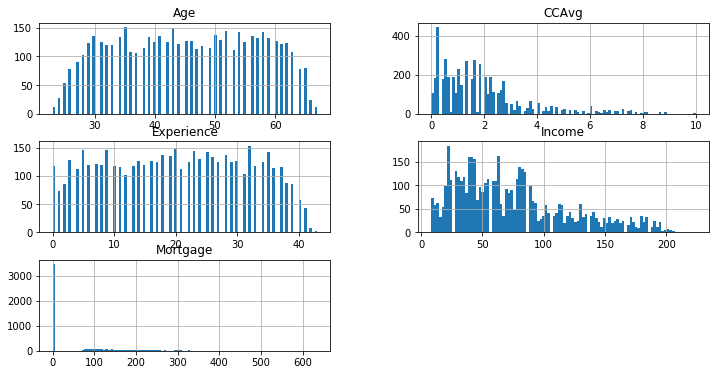

In [19]:
columns=['Age','Experience','Income','CCAvg','Mortgage']
df[columns].hist(stacked=False, bins=100, figsize=(12,30), layout=(14,2))
plt.show()

skewness: -0.02934068151284029


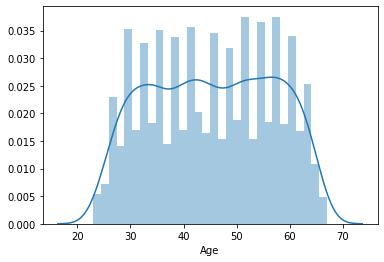

In [20]:
#distribution of age is quite uniform
sns.distplot(df['Age'],bins=30) 
print('skewness: '+str(df['Age'].skew()))

skewness: -0.017220705364694253


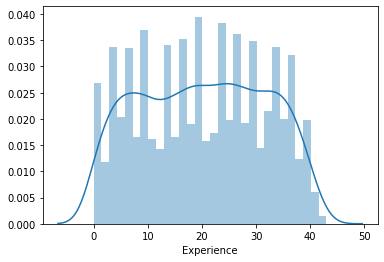

In [21]:
#distribution of experience is also quite uniform
sns.distplot(df['Experience'],bins=30)
print('skewness: '+str(df['Experience'].skew()))

skewness: 0.8413386072610816


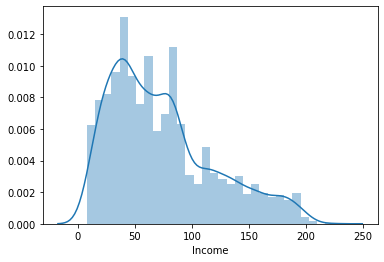

In [22]:
#distribution of income is right skewed and skewness is very high
sns.distplot(df['Income'],bins=30)
print('skewness: '+str(df['Income'].skew()))

skewness: 1.5984433366678663


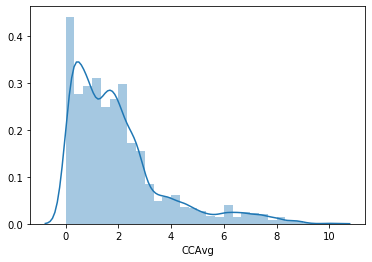

In [23]:
#distribution of ccavg is right skewed and skewness is very high
sns.distplot(df['CCAvg'],bins=30)
print('skewness: '+str(df['CCAvg'].skew()))

skewness: 2.1040023191079444


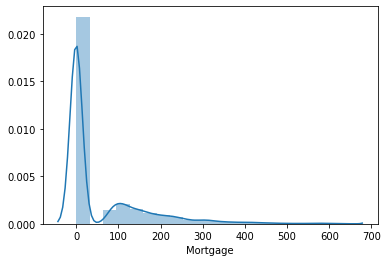

In [24]:
#distribution of mortgage is right skewed
sns.distplot(df['Mortgage'],bins=20)
print('skewness: '+str(df['Mortgage'].skew()))

**We can see that 3 of our columns are highly skewed and surely there are a lot of outliers, hence in the later sections we will first tranform our dataset to handle skewness and then we will treat the outliers.**<br>
**We will be using RobustScaler since we are scaling with outliers.**

1    2096
3    1501
2    1403
Name: Education, dtype: int64


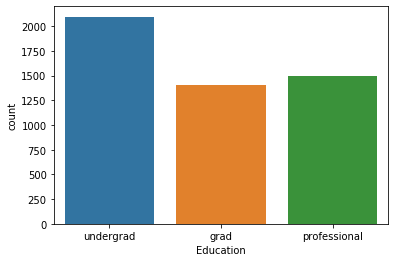

In [25]:
#lets see distribution of education of the customers
print(df['Education'].value_counts())
sns.countplot(x="Education",data=df)
plt.xticks([0,1,2],['undergrad','grad','professional'])
plt.show()

#most customers are undergraduate, followed by professionals/advanced at second number
#though no. of professionals and graduates are nearly equal - a difference of 100 people only

1    1472
2    1296
4    1222
3    1010
Name: Family, dtype: int64


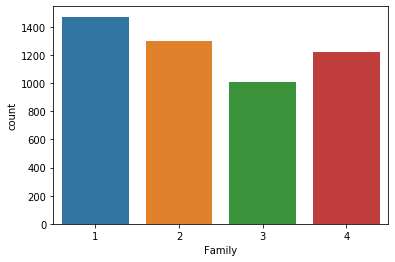

In [26]:
#distribution of family size of the customers
print(df['Family'].value_counts())
sns.countplot(x="Family",data=df)
plt.show()

#maximum customers are singles(family size 1,no family) - 1472
#customers having 2 and 4 family members are nearly same - difference of 74 customers only
#customers having a family size of 3 are least (1010 customers only)

C:\Users\sunaal\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  del sys.path[0]


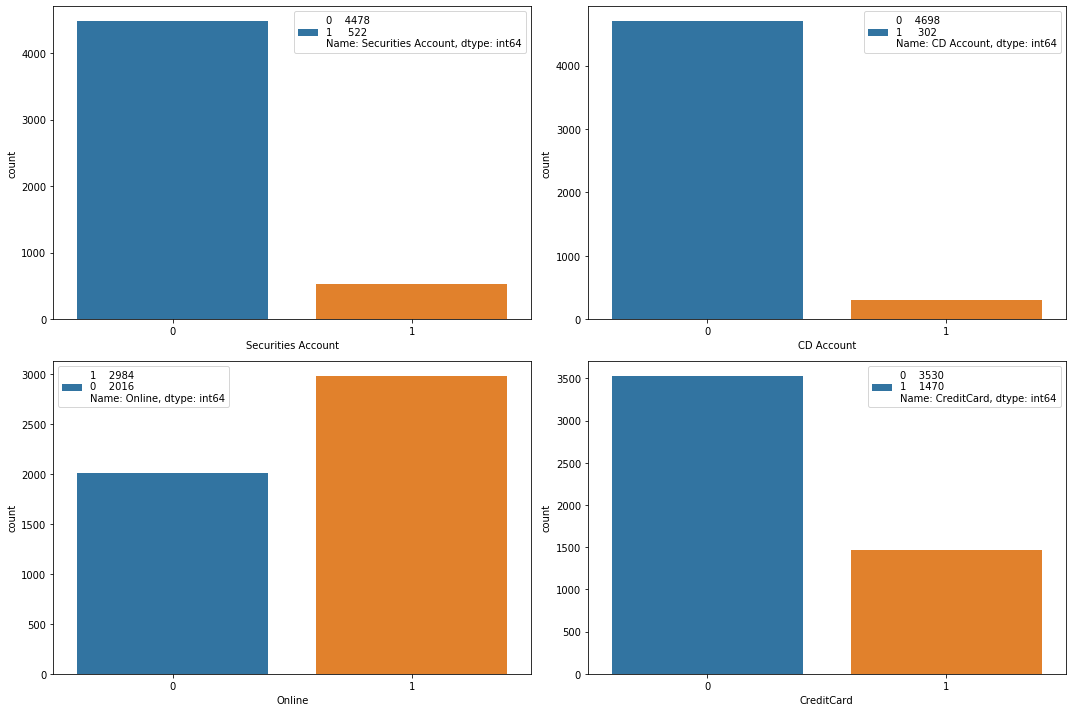

In [27]:
#similarly, distribution of other categorical columns - read the legend to know the count in each category
fig, ax =plt.subplots(nrows=2,ncols=2,figsize=(15, 10))
sns.countplot(df['Securities Account'], ax=ax[0][0])
sns.countplot(df['CD Account'], ax=ax[0][1])
sns.countplot(df['Online'], ax=ax[1][0])
sns.countplot(df['CreditCard'], ax=ax[1][1])

ax[0][0].legend(labels=[str(df['Securities Account'].value_counts())])
ax[0][1].legend(labels=[str(df['CD Account'].value_counts())])
ax[1][0].legend(labels=[str(df['Online'].value_counts())])
ax[1][1].legend(labels=[str(df['CreditCard'].value_counts())])

fig.show()
plt.tight_layout()

## Distribution of 'Personal Loan' across all variables - Multivariate Analysis Pt. 1

avg. Income of people who didnt accept the loan: 66.23738938053097
avg. Income of people who accepted the loan: 144.74583333333334
IT SEEMS THAT PEOPLE IN HIGHER INCOME GROUP HAVE ACCEPTED THE LOAN. PEOPLE WHO ACCEPT THE LOAN HAVE AN AVG. INCOME OF 144.75 THOUSAND DOLLARS ANUALLY


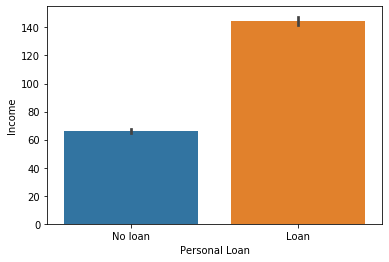

In [28]:
#avg income of customers who took the loan and who didnt
sns.barplot(x='Personal Loan',y="Income",data=df)
plt.xticks([0,1],['No loan','Loan'])

print("avg. Income of people who didnt accept the loan: "+str(df[df['Personal Loan']==0]['Income'].mean()))
print("avg. Income of people who accepted the loan: "+str(df[df['Personal Loan']==1]['Income'].mean()))
print("IT SEEMS THAT PEOPLE IN HIGHER INCOME GROUP HAVE ACCEPTED THE LOAN. PEOPLE WHO ACCEPT THE LOAN HAVE AN AVG. INCOME OF 144.75 THOUSAND DOLLARS ANUALLY")

avg. house Mortgage of people who didnt accept the loan: 51.78938053097345
avg. house Mortgage of people who accepted the loan: 100.84583333333333
CLEARLY, PEOPLE WHO ACCEPTED THE LOAN HAVE HIGHER HOUSE MORTGAGE (AROUND A 100 THOUSAND DOLLARS)


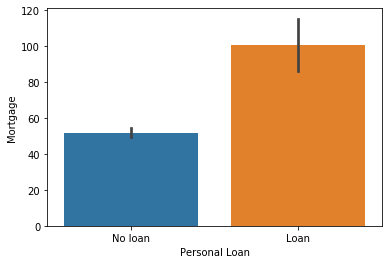

In [29]:
#avg mortgage of customers who took the loan and who didnt
sns.barplot(x='Personal Loan',y="Mortgage",data=df)
plt.xticks([0,1],['No loan','Loan'])

print("avg. house Mortgage of people who didnt accept the loan: "+str(df[df['Personal Loan']==0]['Mortgage'].mean()))
print("avg. house Mortgage of people who accepted the loan: "+str(df[df['Personal Loan']==1]['Mortgage'].mean()))
print("CLEARLY, PEOPLE WHO ACCEPTED THE LOAN HAVE HIGHER HOUSE MORTGAGE (AROUND A 100 THOUSAND DOLLARS)")

avg. creditcard spending/month of people who didnt accept the loan: 1.7290088495575293
avg. creditcard spending/month of people who accepted the loan: 3.9053541666666662
PEOPLE WHO ACCEPTED THE LOAN SPEND AROUND 3.90 THOUSAND DOLLARS PER MONTH ON CREDIT CARDS


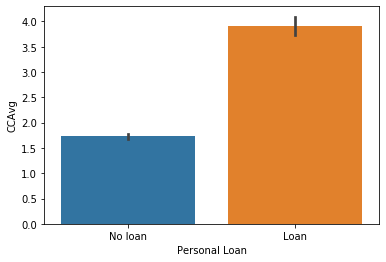

In [30]:
#avg credit card spending/month of customers who took the loan and who didnt
sns.barplot(x='Personal Loan',y="CCAvg",data=df)
plt.xticks([0,1],['No loan','Loan'])

print("avg. creditcard spending/month of people who didnt accept the loan: "+str(df[df['Personal Loan']==0]['CCAvg'].mean()))
print("avg. creditcard spending/month of people who accepted the loan: "+str(df[df['Personal Loan']==1]['CCAvg'].mean()))
print("PEOPLE WHO ACCEPTED THE LOAN SPEND AROUND 3.90 THOUSAND DOLLARS PER MONTH ON CREDIT CARDS")

AMONG THE PEOPLE WHO ACCEPTED THE LOAN. MAXIMUM ARE PROFFESSIONALS, FOLLOWED BY GRADUATES AT 2ND NUMBER AND THEN UNDERGRADS AT 3RD


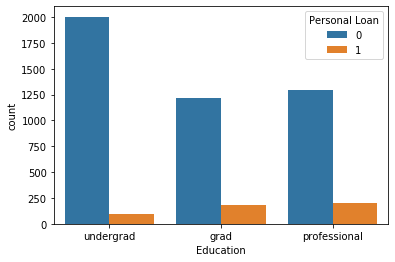

In [31]:
#lets see the educational status of people who took the loan and who didnt
print("AMONG THE PEOPLE WHO ACCEPTED THE LOAN. MAXIMUM ARE PROFFESSIONALS, FOLLOWED BY GRADUATES AT 2ND NUMBER AND THEN UNDERGRADS AT 3RD")
sns.countplot(x="Education",data=df,hue="Personal Loan")
plt.xticks([0,1,2],['undergrad','grad','professional'])
plt.show()

C:\Users\sunaal\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  """


MOSTLY PEOPLE WHO ACCEPTED THE LOAN FROM THIS BANK, DONT HAVE A SECURITY ACCOUNT OR A CD ACCOUNT WITH THE BANK


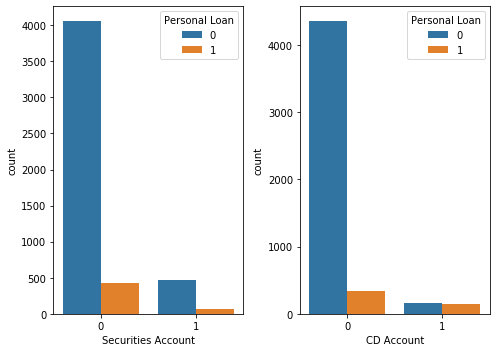

In [32]:
fig, ax =plt.subplots(nrows=1,ncols=2,figsize=(7, 5))
sns.countplot(x="Securities Account",data=df,hue="Personal Loan",ax=ax[0])
sns.countplot(x="CD Account",data=df,hue="Personal Loan",ax=ax[1])

fig.show()
plt.tight_layout()

print('MOSTLY PEOPLE WHO ACCEPTED THE LOAN FROM THIS BANK, DONT HAVE A SECURITY ACCOUNT OR A CD ACCOUNT WITH THE BANK')

C:\Users\sunaal\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  """


AMONG THE PEOPLE WHO ACCEPTED THE LOAN, AROUND 250 OF THEM USE ONLINE FASCILITIES
AGAIN, AMONG THE PEOPLE WHO ACCEPTED THE LOAN, THERE ARE MORE NO. OF PEOPLE WHO DONT HAVE A CREDITCARD


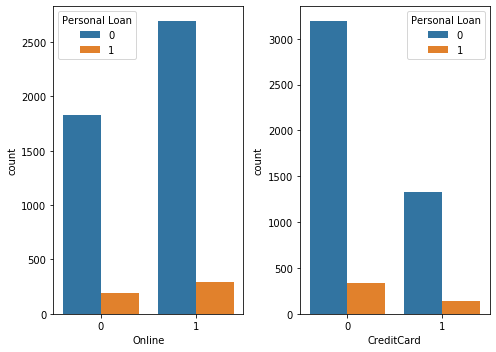

In [33]:
fig, ax =plt.subplots(nrows=1,ncols=2,figsize=(7, 5))
sns.countplot(x="Online",data=df,hue="Personal Loan",ax=ax[0])
sns.countplot(x="CreditCard",data=df,hue="Personal Loan",ax=ax[1])

fig.show()
plt.tight_layout()

print('AMONG THE PEOPLE WHO ACCEPTED THE LOAN, AROUND 250 OF THEM USE ONLINE FASCILITIES')
print('AGAIN, AMONG THE PEOPLE WHO ACCEPTED THE LOAN, THERE ARE MORE NO. OF PEOPLE WHO DONT HAVE A CREDITCARD')

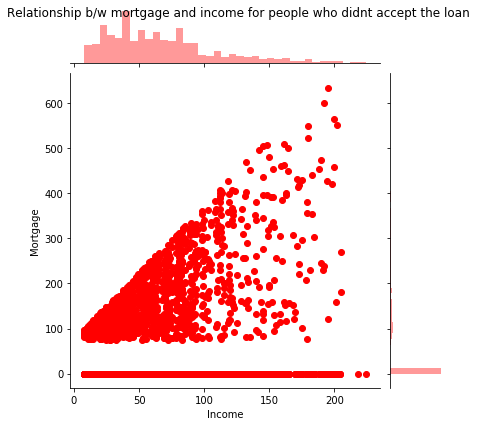

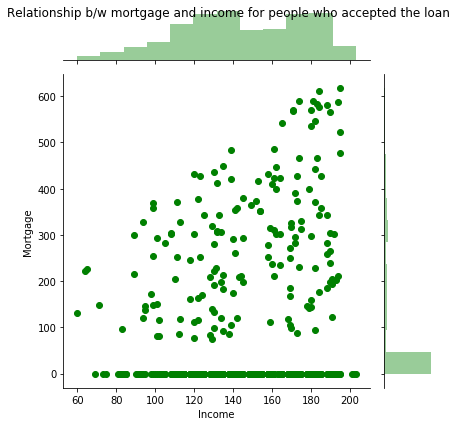

In [34]:
#lets see how income and mortgage varies together for people who accepted the loan and who didnt
ax1 = sns.jointplot(x="Income",y="Mortgage",data=df[df['Personal Loan']==0],color="red")
ax2 = sns.jointplot(x="Income",y="Mortgage",data=df[df['Personal Loan']==1],color="green")
ax1.fig.suptitle('Relationship b/w mortgage and income for people who didnt accept the loan')
ax2.fig.suptitle('Relationship b/w mortgage and income for people who accepted the loan')
plt.tight_layout()
plt.show()

## Multivariate analysis Pt. 2

C:\Users\sunaal\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\sunaal\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


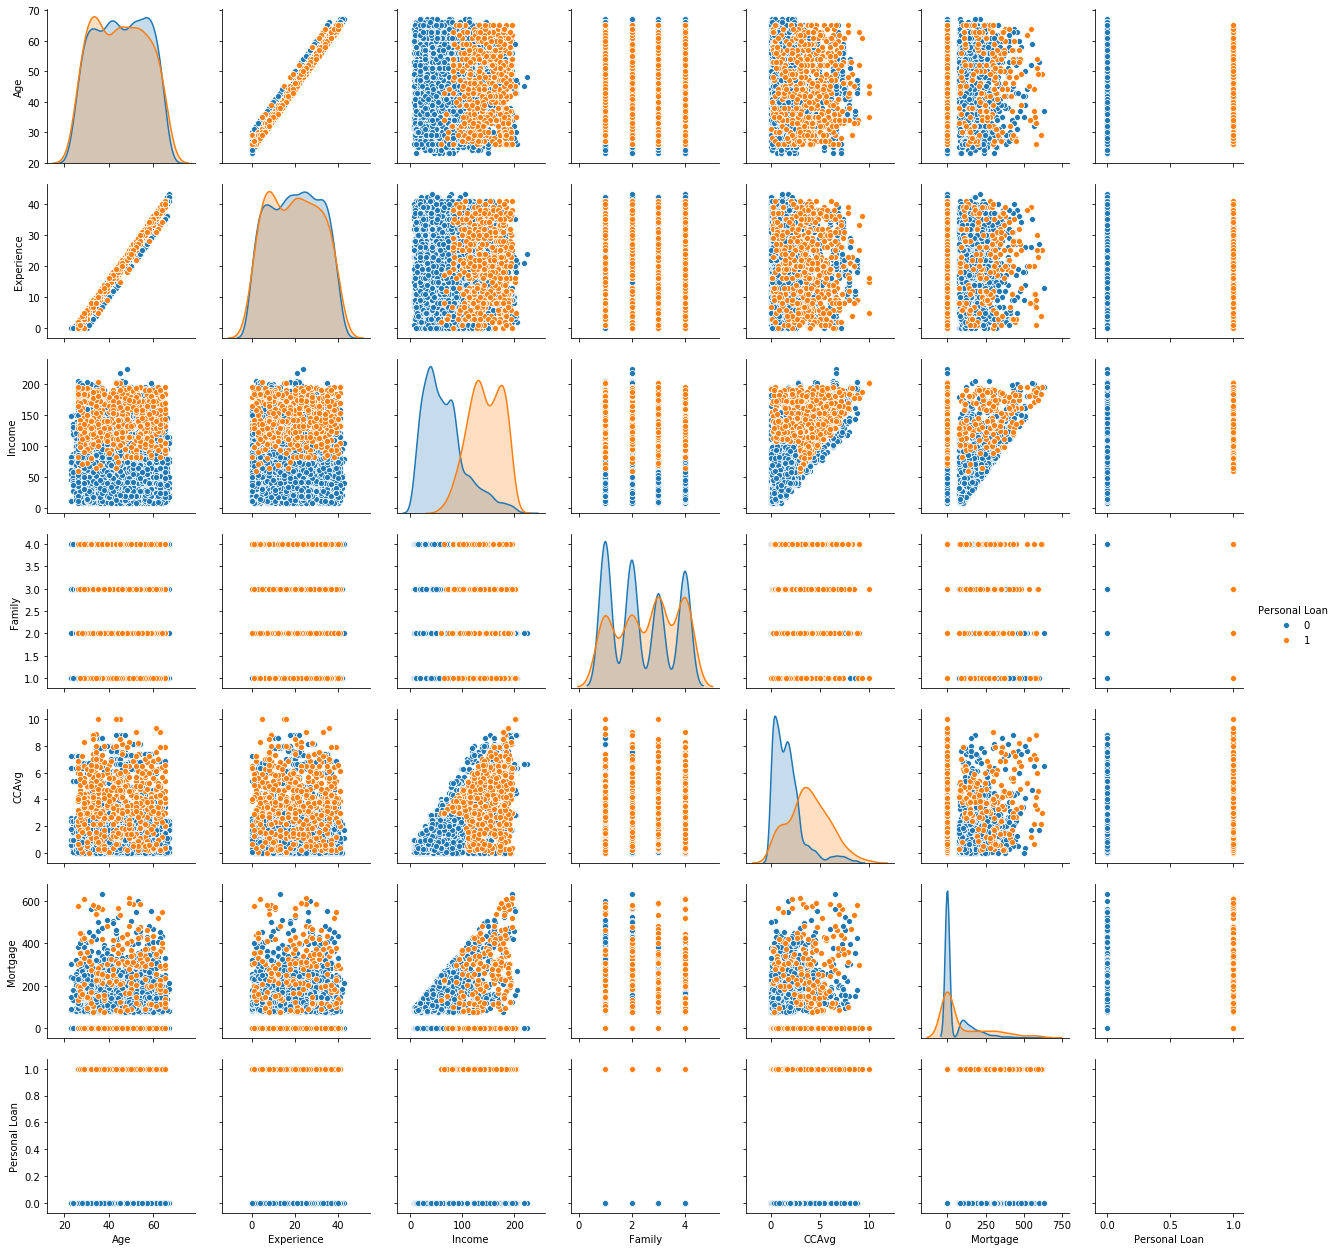

In [35]:
sns.pairplot(data=df[['Age','Experience','Income','Family','CCAvg','Mortgage','Personal Loan']],hue="Personal Loan")

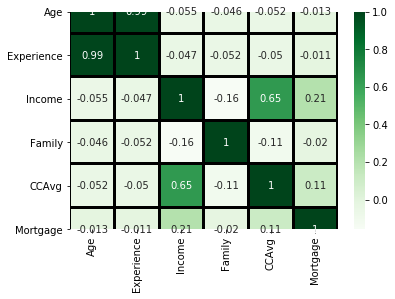

In [36]:
sns.heatmap(df.corr(),cmap="Greens",linecolor="black",linewidth=2,annot=True)

#there is very low correlation among variables variables
#Age and Experience shows maximumn correlation which is obvious
#otherwise, there is very less correlation b/w variables, CCAvg and income shows some sort of correlation around 0.65

# Robust scaling and treating outliers
#### Like we have said before that we will be using robust scalar since we are scalling with outliers

In [37]:
from sklearn.preprocessing import RobustScaler

#seperating our target variable before scaling
y = df['Personal Loan']
df.drop('Personal Loan',axis=1,inplace=True)
x = df.iloc[:,:]

In [38]:
x.columns

Index(['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Education',
       'Mortgage', 'Securities Account', 'CD Account', 'Online', 'CreditCard'],
      dtype='object')

In [39]:
#now tranforming our features
x_scaled = pd.DataFrame(RobustScaler().fit_transform(x))
x_scaled.columns = x.columns
x_scaled.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
0,-1.0,-0.95,-0.254237,1.0,0.055556,-0.5,0.0,1.0,0.0,-1.0,0.0
1,0.0,-0.05,-0.508475,0.5,0.000000,-0.5,0.0,1.0,0.0,-1.0,0.0
2,-0.3,-0.25,-0.898305,-0.5,-0.277778,-0.5,0.0,0.0,0.0,-1.0,0.0
3,-0.5,-0.55,0.610169,-0.5,0.666667,0.0,0.0,0.0,0.0,-1.0,0.0
4,-0.5,-0.60,-0.322034,1.0,-0.277778,0.0,0.0,0.0,0.0,-1.0,1.0


### Checking the presence of outliers in ‘age’ , ‘experience’ , ‘income' , 'CCAvg' and 'mortgage'
###### Q3+1.5(IQR) < outlier < Q1-1.5(IQR)

### Age

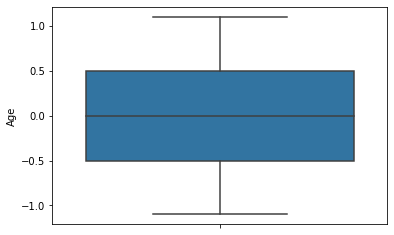

In [40]:
sns.boxplot(y='Age',data=x_scaled)

In [41]:
Q1 = np.percentile(a=x_scaled['Age'], q=25)
Q3 = np.percentile(a=x_scaled['Age'], q=75)
IQR = Q3 - Q1
print(IQR)

ul = Q3+(1.5*IQR) 
ll = Q1-(1.5*IQR)
print('lower limit: '+str(ll))
print('upper limit: '+str(ul))
print(str(Q3+(1.5*IQR))+'< outlier < '+str(Q1-(1.5*IQR)))

1.0
lower limit: -2.0
upper limit: 2.0
2.0< outlier < -2.0


In [42]:
x_scaled[(x_scaled['Age']>ul) | (x_scaled['Age']<ll)]

#no outliers

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard


### Experience

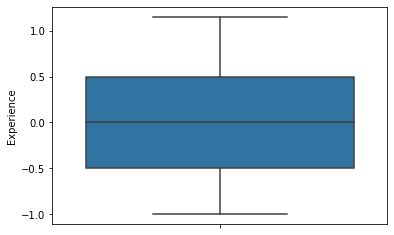

In [43]:
sns.boxplot(y='Experience',data=x_scaled)

In [44]:
Q1 = np.percentile(a=x_scaled['Experience'], q=25)
Q3 = np.percentile(a=x_scaled['Experience'], q=75)
IQR = Q3 - Q1
print(IQR)

ul = Q3+(1.5*IQR) 
ll = Q1-(1.5*IQR)
print('lower limit: '+str(ll))
print('upper limit: '+str(ul))
print(str(Q3+(1.5*IQR))+'< outlier < '+str(Q1-(1.5*IQR)))

1.0
lower limit: -2.0
upper limit: 2.0
2.0< outlier < -2.0


In [45]:
x_scaled[(x_scaled['Experience']>ul) | (x_scaled['Experience']<ll)]
#no outliers

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard


### Income

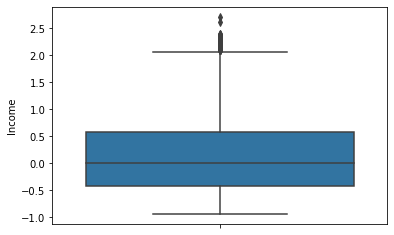

In [46]:
sns.boxplot(y='Income',data=x_scaled)

In [47]:
Q1 = np.percentile(a=x_scaled['Income'], q=25)
Q3 = np.percentile(a=x_scaled['Income'], q=75)
IQR = Q3 - Q1
print(IQR)

ul = Q3+(1.5*IQR) 
ll = Q1-(1.5*IQR)
print('lower limit: '+str(ll))
print('upper limit: '+str(ul))
print(str(Q3+(1.5*IQR))+'< outlier < '+str(Q1-(1.5*IQR)))

1.0
lower limit: -1.923728813559322
upper limit: 2.076271186440678
2.076271186440678< outlier < -1.923728813559322


In [48]:
x_scaled[(x_scaled['Income']>ul) | (x_scaled['Income']<ll)]
#96 outliers

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
18,0.05,0.05,2.186441,0.0,3.666667,0.5,0.000000,0.0,0.0,-1.0,0.0
47,-0.40,-0.40,2.203390,1.0,-0.722222,0.5,2.089109,1.0,1.0,0.0,1.0
53,0.25,0.30,2.135593,0.5,0.333333,0.5,2.376238,0.0,0.0,0.0,0.0
59,-0.70,-0.75,2.101695,0.0,1.666667,-0.5,4.504950,0.0,0.0,-1.0,0.0
303,0.20,0.25,2.220339,1.0,0.833333,-0.5,6.108911,0.0,0.0,-1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
4659,-0.85,-0.80,2.288136,-0.5,2.683333,-0.5,0.000000,0.0,0.0,-1.0,0.0
4670,0.35,0.30,2.203390,-0.5,0.111111,-0.5,0.000000,0.0,0.0,0.0,0.0
4895,0.00,0.00,2.322034,0.0,0.722222,-0.5,0.000000,0.0,0.0,0.0,1.0
4981,-0.55,-0.55,2.220339,0.0,0.833333,-0.5,1.207921,0.0,0.0,0.0,0.0


### CCAvg

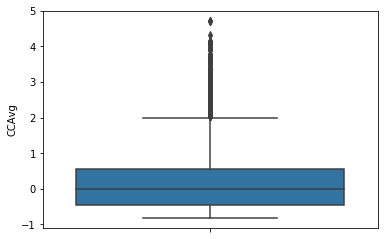

In [49]:
sns.boxplot(y='CCAvg',data=x_scaled)

In [50]:
Q1 = np.percentile(a=x_scaled['CCAvg'], q=25)
Q3 = np.percentile(a=x_scaled['CCAvg'], q=75)
IQR = Q3 - Q1
print(IQR)

ul = Q3+(1.5*IQR) 
ll = Q1-(1.5*IQR)
print('lower limit: '+str(ll))
print('upper limit: '+str(ul))
print(str(Q3+(1.5*IQR))+'< outlier < '+str(Q1-(1.5*IQR)))

1.0
lower limit: -1.9444444444444444
upper limit: 2.0555555555555554
2.0555555555555554< outlier < -1.9444444444444444


In [51]:
x_scaled[(x_scaled['CCAvg']>ul) | (x_scaled['CCAvg']<ll)]
#340 outliers

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
9,-0.55,-0.55,1.966102,-0.5,4.111111,0.5,0.000000,0.0,0.0,-1.0,0.0
18,0.05,0.05,2.186441,0.0,3.666667,0.5,0.000000,0.0,0.0,-1.0,0.0
44,0.05,0.00,0.677966,-0.5,2.333333,-0.5,0.000000,0.0,0.0,0.0,1.0
55,-0.20,-0.15,1.271186,0.0,3.611111,-0.5,0.000000,0.0,0.0,0.0,0.0
61,0.10,0.05,1.033898,-0.5,2.333333,-0.5,1.108911,1.0,0.0,-1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
4908,-0.25,-0.20,1.254237,0.0,2.555556,-0.5,0.000000,0.0,0.0,0.0,0.0
4911,0.05,0.10,1.508475,0.0,3.333333,-0.5,0.000000,0.0,0.0,-1.0,0.0
4937,-0.60,-0.60,1.661017,-0.5,3.944444,-0.5,0.000000,0.0,1.0,0.0,1.0
4980,-0.80,-0.75,1.203390,0.5,2.111111,-0.5,0.000000,0.0,1.0,0.0,1.0


### Mortgage

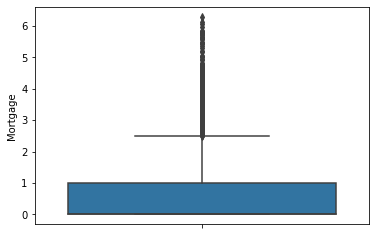

In [52]:
sns.boxplot(y='Mortgage',data=x_scaled)

In [53]:
Q1 = np.percentile(a=x_scaled['Mortgage'], q=25)
Q3 = np.percentile(a=x_scaled['Mortgage'], q=75)
IQR = Q3 - Q1
print(IQR)

ul = Q3+(1.5*IQR) 
ll = Q1-(1.5*IQR)
print('lower limit: '+str(ll))
print('upper limit: '+str(ul))
print(str(Q3+(1.5*IQR))+'< outlier < '+str(Q1-(1.5*IQR)))

1.0
lower limit: -1.5
upper limit: 2.5
2.5< outlier < -1.5


In [54]:
x_scaled[(x_scaled['Mortgage']>ul) | (x_scaled['Mortgage']<ll)]
#291 outliers

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
22,-0.80,-0.75,-0.033898,-0.5,-0.166667,-0.5,2.574257,0.0,0.0,0.0,0.0
39,-0.35,-0.35,0.271186,1.0,-0.444444,0.5,2.821782,0.0,0.0,0.0,0.0
42,-0.65,-0.65,1.152542,1.0,-0.222222,0.0,4.079208,0.0,0.0,0.0,0.0
59,-0.70,-0.75,2.101695,0.0,1.666667,-0.5,4.504950,0.0,0.0,-1.0,0.0
66,0.85,0.80,0.694915,0.0,0.722222,-0.5,3.326733,0.0,0.0,-1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
4859,-0.55,-0.60,1.711864,-0.5,3.055556,0.5,5.356436,0.0,0.0,-1.0,0.0
4865,0.25,0.20,1.169492,1.0,-0.055556,0.0,3.386139,0.0,0.0,-1.0,1.0
4899,0.45,0.45,0.355932,1.0,-0.111111,0.5,2.960396,0.0,0.0,0.0,0.0
4942,0.35,0.30,0.762712,-0.5,0.500000,-0.5,3.049505,0.0,1.0,0.0,1.0


**Treating outliers**

In [55]:
x_scaled.median()

Age                   0.0
Experience            0.0
Income                0.0
Family                0.0
CCAvg                 0.0
Education             0.0
Mortgage              0.0
Securities Account    0.0
CD Account            0.0
Online                0.0
CreditCard            0.0
dtype: float64

we can see that robust scaling is done in such a way that the median of every column is centered around 0, therefore we will replace outliers with median  

In [56]:
#upper limit for income was 2.076271186440678,lower limit was -1.923728813559322 and replaced with median=0.0
x_scaled['Income'][(x_scaled['Income']>2.076271186440678) | (x_scaled['Income']<-1.923728813559322)] = 0.0

x_scaled[(x_scaled['Income']>2.076271186440678) | (x_scaled['Income']<-1.923728813559322)]
#outliers in income column have been updated to the mode of the income column

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard


In [57]:
#upper limit for CCAvg was 2.0555555555555554,lower limit was -1.9444444444444444 and replaced with median=0.0

x_scaled['CCAvg'][(x_scaled['CCAvg']>2.0555555555555554) | (x_scaled['CCAvg']<-1.9444444444444444)] = 0.0

x_scaled[(x_scaled['CCAvg']>2.0555555555555554) | (x_scaled['CCAvg']<-1.9444444444444444)]
#outliers in CCAvg column have been updated to the mode of the CCAvg column

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard


In [58]:
#upper limit for Mortgage was 2.5,lower limit was -1.5 and replaced with median=0.0

x_scaled['Mortgage'][(x_scaled['Mortgage']>2.5) | (x_scaled['Mortgage']<-1.5)] = 0.0

x_scaled[(x_scaled['Mortgage']>2.5) | (x_scaled['Mortgage']<-1.5)]
#outliers in Mortgage column have been updated to the mode of the Mortgage column

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard


# Splitting x_scaled and y in training and testing set
### 70:30 ratio

In [59]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.3, random_state=100)
x_train.shape

(3500, 11)

In [60]:
x_test.shape

(1500, 11)

people who accepted loan are distributed in the same ratio in both training and testing set. However, The ratio of 1' and 0's within the training and testing set is imbalanced. (we saw the same ratio in our dataset before splitting) 

In [61]:
y_train.value_counts(normalize=True)

0    0.908
1    0.092
Name: Personal Loan, dtype: float64

In [62]:
y_test.value_counts(normalize=True)

0    0.894667
1    0.105333
Name: Personal Loan, dtype: float64

# 1) LOGISTIC REGRESSION

In [63]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix

#Build the logistic regression model
logisticRegr = LogisticRegression()

In [64]:
logisticRegr.fit(x_train, y_train)
score = logisticRegr.score(x_test, y_test)
print("accuracy of the model on test set: "+str(score))

accuracy of the model on test set: 0.9406666666666667


C:\Users\sunaal\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [65]:
ypred_train = logisticRegr.predict(x_train)
mat_train = confusion_matrix(y_train,ypred_train)

df_cm = pd.DataFrame(mat_train, index = [i for i in ["Truth(didnt accept)","Truth(accepted)"]],
                  columns = [i for i in ["Predict(will not accept)","Predict(will accept)"]])

print("CONFUSION MATRIX OF TRAINING SET")
print("TP: 3144")
print("TN: 193")
print("FP(type 1 error): 34")
print("FN(type 2 error): 129")
df_cm

CONFUSION MATRIX OF TRAINING SET
TP: 3144
TN: 193
FP(type 1 error): 34
FN(type 2 error): 129


,Predict(will not accept),Predict(will accept)
Truth(didnt accept),3144,34
Truth(accepted),129,193


In [66]:
ypred_test = logisticRegr.predict(x_test)
mat_test = confusion_matrix(y_test,ypred_test)

logistic_cm = pd.DataFrame(mat_test, index = [i for i in ["Truth(didnt accept)","Truth(accepted)"]],
                  columns = [i for i in ["Predict(will not accept)","Predict(will accept)"]])

print("CONFUSION MATRIX OF TESTING SET")
print("TP: 1325")
print("TN: 86")
print("FP(type 1 error): 17")
print("FN(type 2 error): 72")
logistic_cm

CONFUSION MATRIX OF TESTING SET
TP: 1325
TN: 86
FP(type 1 error): 17
FN(type 2 error): 72


,Predict(will not accept),Predict(will accept)
Truth(didnt accept),1325,17
Truth(accepted),72,86


###### ROC AUC score and curve

In [67]:
print(logisticRegr.classes_) 

[0 1]


In [68]:
y_test_predict_probabilities = logisticRegr.predict_proba(x_test)
# y_test_predict_probabilities
ytest_probabilities = y_test_predict_probabilities[:,1] #these are the probabilities of datapoint belonging to class 1
ytest_probabilities

array([2.06008910e-03, 2.44902599e-03, 5.18252488e-04, ...,
       8.51115276e-01, 3.82324412e-02, 2.64437062e-01])

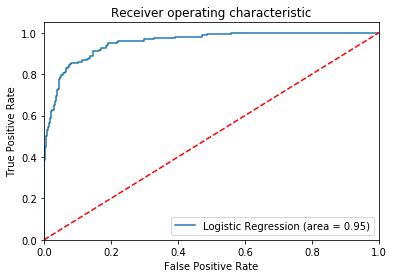

In [69]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

area_under_curve = roc_auc_score(y_test, ytest_probabilities)
fpr, tpr, thresholds = roc_curve(y_test, ytest_probabilities)

plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % area_under_curve)
plt.plot([0, 1], [0, 1],'r--') #this read lines divide area into 2 halves
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [70]:
area_under_curve = roc_auc_score(y_test, ytest_probabilities)
print("area under the curve: "+str(area_under_curve))

area under the curve: 0.9537389877190666


###### classification report

In [71]:
ypred_test = logisticRegr.predict(x_test)
logistic_cr = classification_report(y_true=y_test, y_pred=ypred_test, target_names=["didnt accept","accepted"])
print(logistic_cr)

#we shall discuss the performance in later section

              precision    recall  f1-score   support

didnt accept       0.95      0.99      0.97      1342
    accepted       0.83      0.54      0.66       158

    accuracy                           0.94      1500
   macro avg       0.89      0.77      0.81      1500
weighted avg       0.94      0.94      0.94      1500



# 2) KNN - K nearest neighbours
why knn?<br>
We have seen that our dataset has outliers and knn usually never gets affected by outliers. Hence KNN could be a good choice for classification in this case.<br>
Later we shall discuss the performance of each model and state which model is best for this dataset and why.

#### we will first run a model for k=2,7 and 11

In [72]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors= 2 , weights = 'distance' )
knn_model.fit(x_train, y_train)
print("accuracy on test set: "+str(knn_model.score(x_test, y_test)))

accuracy on test set: 0.9426666666666667


In [73]:
knn_model = KNeighborsClassifier(n_neighbors= 7 , weights = 'distance' )
knn_model.fit(x_train, y_train)
print("accuracy on test set: "+str(knn_model.score(x_test, y_test)))

accuracy on test set: 0.942


In [74]:
knn_model = KNeighborsClassifier(n_neighbors= 11 , weights = 'distance' )
knn_model.fit(x_train, y_train)
print("accuracy on test set: "+str(knn_model.score(x_test, y_test)))

accuracy on test set: 0.944


### Lets find the optimum value of k (cross validation)
###### MSE(miss classification error) = 1 - test accuracy score

In [75]:
#we will check for all odd values of k from 1 to 40
expected_k = list(range(1,45,2))
expected_k #stepsize of 2 so that we have odd values of k

[1,
 3,
 5,
 7,
 9,
 11,
 13,
 15,
 17,
 19,
 21,
 23,
 25,
 27,
 29,
 31,
 33,
 35,
 37,
 39,
 41,
 43]

In [76]:
mse = []

# perform accuracy metrics for values from 1,3,5....19
for k in expected_k:
    knn = KNeighborsClassifier(n_neighbors=k,weights = 'distance')
    knn.fit(x_train, y_train)
    score = knn.score(x_test, y_test)
    Missclassification_error = 1-score
    mse.append(Missclassification_error)

mse #mse for each value of k from 3-19

[0.05733333333333335,
 0.053333333333333344,
 0.05400000000000005,
 0.05800000000000005,
 0.05466666666666664,
 0.05600000000000005,
 0.05733333333333335,
 0.058666666666666645,
 0.058666666666666645,
 0.06000000000000005,
 0.06133333333333335,
 0.06266666666666665,
 0.06333333333333335,
 0.06533333333333335,
 0.06666666666666665,
 0.06933333333333336,
 0.06999999999999995,
 0.07133333333333336,
 0.07199999999999995,
 0.07199999999999995,
 0.07333333333333336,
 0.07333333333333336]

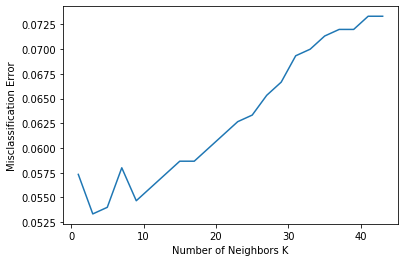

In [77]:
plt.plot(expected_k, mse)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

In [78]:
#most optimum value of k (k that has the minimum mse)
optimum_k = expected_k[mse.index(min(mse))]
print("most optimum number of neighbours, k: "+str(optimum_k))

most optimum number of neighbours, k: 3


### Hence we choose 3-NN to be our best model

In [79]:
knn_model = KNeighborsClassifier(n_neighbors= 3 , weights = 'distance' )
knn_model.fit(x_train, y_train)
print("accuracy on test set: "+str(knn_model.score(x_test, y_test)))

accuracy on test set: 0.9466666666666667


In [80]:
print("CONFUSION MATRIX ON TESTING SET")
predicted_labels = knn_model.predict(x_test)
cm=confusion_matrix(y_test, predicted_labels)

knn_cm = pd.DataFrame(cm, index = [i for i in ["Truth(didnt accept)","Truth(accepted)"]],
                  columns = [i for i in ["Predict(will not accept)","Predict(will accept)"]])


print("TP: 1326")
print("TN: 94")
print("FP(type 1 error): 16")
print("FN(type 2 error): 64")
knn_cm

CONFUSION MATRIX ON TESTING SET
TP: 1326
TN: 94
FP(type 1 error): 16
FN(type 2 error): 64


,Predict(will not accept),Predict(will accept)
Truth(didnt accept),1326,16
Truth(accepted),64,94


In [81]:
#pd.crosstab(y_test, predicted_labels, rownames=['True'], colnames=['Predicted'], margins=True)

###### classification report

In [82]:
knn_cr = classification_report(y_true=y_test, y_pred=predicted_labels,target_names=["didnt accept","accepted"]) 
print(knn_cr)

              precision    recall  f1-score   support

didnt accept       0.95      0.99      0.97      1342
    accepted       0.85      0.59      0.70       158

    accuracy                           0.95      1500
   macro avg       0.90      0.79      0.84      1500
weighted avg       0.94      0.95      0.94      1500



# 3) Naive Bayes

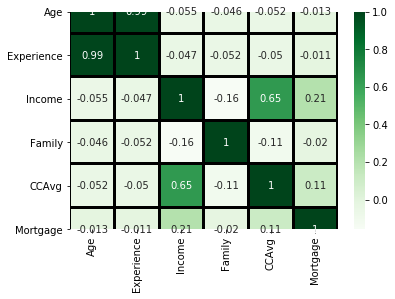

In [83]:
sns.heatmap(df.corr(),cmap="Greens",linecolor="black",linewidth=2,annot=True)

why naive bayes?<br>
Looking at the correlation between our predictors, Naive bayes could also be good model for this dataset. Naive bayes assumes the predictors to be independent and by looking at the very low correlation between our predictors in the above figure, we can incurr that naive bayes can be a good choice.<br>
In later section we will discuss in detail which model is better and why for this dataset

In [84]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(x_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [85]:
from sklearn import metrics
y_predict_nb = gnb.predict(x_test)
print("accuracy on test set: "+str(gnb.score(x_test, y_test)))

accuracy on test set: 0.8986666666666666


In [86]:
print("CONFUSION MATRIX ON TESTING SET")
nb_predicted_labels = gnb.predict(x_test)
cm=confusion_matrix(y_test, nb_predicted_labels)

gnb_cm = pd.DataFrame(cm, index = [i for i in ["Truth(didnt accept)","Truth(accepted)"]],
                  columns = [i for i in ["Predict(will not accept)","Predict(will accept)"]])


print("TP: 1269")
print("TN: 79")
print("FP(type 1 error): 73")
print("FN(type 2 error): 79")
gnb_cm

CONFUSION MATRIX ON TESTING SET
TP: 1269
TN: 79
FP(type 1 error): 73
FN(type 2 error): 79


,Predict(will not accept),Predict(will accept)
Truth(didnt accept),1269,73
Truth(accepted),79,79


###### ROC AUC score and curve

In [87]:
print(gnb.classes_) 

[0 1]


In [88]:
y_test_probabilities_nb = gnb.predict_proba(x_test)
ytest_probabilitiesnb = y_test_probabilities_nb[:,1] #these are the probabilities of datapoint belonging to class 1
ytest_probabilitiesnb

array([5.25117811e-04, 3.58354044e-04, 1.26733652e-04, ...,
       3.95567447e-01, 2.18839711e-02, 2.83296072e-01])

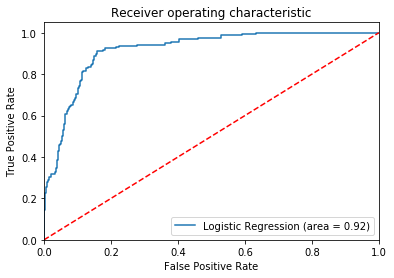

In [89]:
area_under_curve_nb = roc_auc_score(y_test, ytest_probabilitiesnb)
fpr, tpr, thresholds = roc_curve(y_test, ytest_probabilitiesnb)

plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % area_under_curve_nb)
plt.plot([0, 1], [0, 1],'r--') #this read lines divide area into 2 halves
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [90]:
area_under_curve_nb = roc_auc_score(y_test, ytest_probabilitiesnb)
print("area under the curve: "+str(area_under_curve_nb))

area under the curve: 0.916782999113358


In [91]:
gnb_cr = classification_report(y_true=y_test, y_pred=y_predict_nb,target_names=["didnt accept","accepted"]) 
print(gnb_cr)

              precision    recall  f1-score   support

didnt accept       0.94      0.95      0.94      1342
    accepted       0.52      0.50      0.51       158

    accuracy                           0.90      1500
   macro avg       0.73      0.72      0.73      1500
weighted avg       0.90      0.90      0.90      1500



# Comparing results of our models

## confusion matrices
#### type 1 error: false possitive i.e predict person to accept loan but he rejects
#### type 2 error: false negative i.e predict person to reject loan but he accepts

In [92]:
print("logistic regression model")
logistic_cm

logistic regression model


,Predict(will not accept),Predict(will accept)
Truth(didnt accept),1325,17
Truth(accepted),72,86


In [93]:
print("KNN model")
knn_cm

KNN model


,Predict(will not accept),Predict(will accept)
Truth(didnt accept),1326,16
Truth(accepted),64,94


In [94]:
print("naive bayes model")
gnb_cm

naive bayes model


,Predict(will not accept),Predict(will accept)
Truth(didnt accept),1269,73
Truth(accepted),79,79


###### The confusion matrices of knn and logistic model seems almost very similar, on the other hand Naive Bayes shows a lot of type 1 and type 2 errors as compared to the other two. Lets have a look at classification reports

## classification reports

In [95]:
print("----LOGISTIC REG----")
print("")
print(logistic_cr)

----LOGISTIC REG----

              precision    recall  f1-score   support

didnt accept       0.95      0.99      0.97      1342
    accepted       0.83      0.54      0.66       158

    accuracy                           0.94      1500
   macro avg       0.89      0.77      0.81      1500
weighted avg       0.94      0.94      0.94      1500



In [96]:
print("----KNN----")
print("")
print(knn_cr)

----KNN----

              precision    recall  f1-score   support

didnt accept       0.95      0.99      0.97      1342
    accepted       0.85      0.59      0.70       158

    accuracy                           0.95      1500
   macro avg       0.90      0.79      0.84      1500
weighted avg       0.94      0.95      0.94      1500



In [97]:
print("----NAIVE BAYES----")
print("")
print(gnb_cr)

----NAIVE BAYES----

              precision    recall  f1-score   support

didnt accept       0.94      0.95      0.94      1342
    accepted       0.52      0.50      0.51       158

    accuracy                           0.90      1500
   macro avg       0.73      0.72      0.73      1500
weighted avg       0.90      0.90      0.90      1500



#### On the basis of classification reports, knn has a better f1-score than both logistic regression and naive bayes for the minority class(accepted loan)
#### However, for the majority class(didnt accept loan), the f1-score is similar for both knn and logistic, followed by NaiveBayes

# Which model is best ?

**We reject NAIVE BAYES**<br>
Clearly we can see that naive bayes is not a good model in this case with an f1-score of 51% for class 1(accept loan) and 94% for class 0(didnt accept loan). The reason why naive bayes did not perform well is because it assumes the continous variables in the dataset to be normally distributed which is not the case in reality. Our continous variables like age and experience have uniform distribution while other continous variables like income, mortgage and ccavg have highly skewed distribution. Thus, this naive assumption of continous variables having a gaussian distribution is violated

See below:

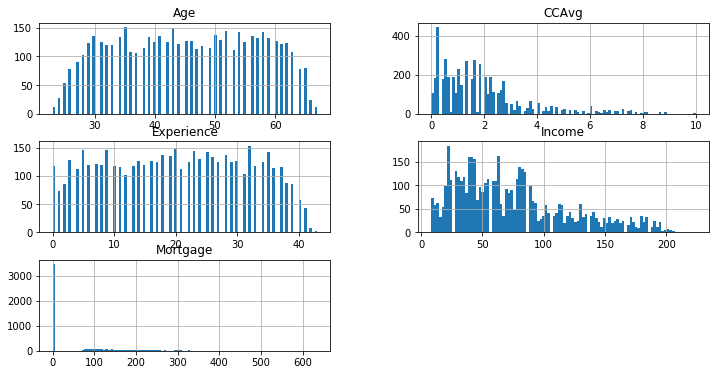

In [98]:
columns=['Age','Experience','Income','CCAvg','Mortgage']
df[columns].hist(stacked=False, bins=100, figsize=(12,30), layout=(14,2))
plt.show()

# Final Verdict

### Now,  since the classification between 1(accept loan) and 0(do not accept loan) in our target variable is highly imbalanced, therefore we can validate both knn and logistic models with different random states to make sure that the results of both the models are consistent and not due to any imbalance   

hence we shall now try for various random states - We had already tried for random state 100, therefore, now we will try for different random states, say, 1000,4000,7000,10000,15000,20000,24000

In [99]:
l1 = [1000,4000,7000,10000,15000,20000,24000]
expected_k = list(range(1,45,2))
logistic_reps = list()
knn_reps = list()

for rs in l1:
    x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.3, random_state=rs)
    
    #logistic model
    logisticRegr = LogisticRegression()
    logisticRegr.fit(x_train, y_train)
    ypred_test = logisticRegr.predict(x_test)
    logistic_cr = classification_report(y_true=y_test, y_pred=ypred_test, target_names=["didnt accept","accepted"])
    logistic_reps.append(logistic_cr)
    
    #knn model
    mse = []
    for k in expected_k:
        knn = KNeighborsClassifier(n_neighbors=k,weights = 'distance')
        knn.fit(x_train, y_train)
        score = knn.score(x_test, y_test)
        Missclassification_error = 1-score
        mse.append(Missclassification_error)
    
    optimum_k = expected_k[mse.index(min(mse))]
    knn_model = KNeighborsClassifier(n_neighbors=optimum_k , weights = 'distance' )
    knn_model.fit(x_train, y_train)
    predicted_labels = knn_model.predict(x_test)
    knn_cr = classification_report(y_true=y_test, y_pred=predicted_labels,target_names=["didnt accept","accepted"])
    knn_reps.append(knn_cr)

C:\Users\sunaal\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\sunaal\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\sunaal\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\sunaal\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\sunaal\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

In [100]:
for idx,rs in enumerate(l1):
    print("for random state: "+str(rs))
    print("******for logistic******")
    print(logistic_reps[idx])
    print("******for knn******")
    print(knn_reps[idx])
    print("")
    print('----------------------------------------------------------------------------------------------')
    print("")

for random state: 1000
******for logistic******
              precision    recall  f1-score   support

didnt accept       0.96      0.99      0.97      1358
    accepted       0.85      0.62      0.72       142

    accuracy                           0.95      1500
   macro avg       0.90      0.80      0.85      1500
weighted avg       0.95      0.95      0.95      1500

******for knn******
              precision    recall  f1-score   support

didnt accept       0.96      1.00      0.98      1358
    accepted       0.97      0.61      0.74       142

    accuracy                           0.96      1500
   macro avg       0.96      0.80      0.86      1500
weighted avg       0.96      0.96      0.96      1500


----------------------------------------------------------------------------------------------

for random state: 4000
******for logistic******
              precision    recall  f1-score   support

didnt accept       0.96      0.99      0.98      1361
    accepted       0.85 

# CONCLUSION - by looking at the classification reports of both the models at different random states we can conclude that the f1-score of both the models are approximately same with KNN being slightly better than logistic regression
# However, If you will notice, precision is always better in KNN by quite a margin. This means that knn is better able to reduce type-1 errors.
# In our case: 
#### type 1 error: false possitive i.e predict person to accept loan but he rejects
#### type 2 error: false negative i.e predict person to reject loan but he accepts
Hence in this scenario our type 1 error is more costly which is: "when we predict a person to accept the loan but he rejects".<br> When type 1 errors are more costly we aim to maximize the precision so as to reduce the type 1 error.<br> Clearly, Knn model is much better at detecting type-1 errors.  

# Hence, we choose KNN to be the best model for this dataset